In [2]:
#dataset has 1376 images
#with and without mask
#690 face image/with mask
#686 without mask
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label

        except Exception as e:
            print('Exception:',e)
            #handeling the exceptions

In [4]:
import numpy as np
from keras.utils import np_utils
#normalizing the data
data=np.array(data)/255.0
#reshaping to 4d array
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
#converting our arrays into numpy array
target=np.array(target)


new_target=np_utils.to_categorical(target)

In [5]:
#saving the numpy arrays for later use
np.save('data',data)
np.save('target',new_target)

['with mask', 'without mask']


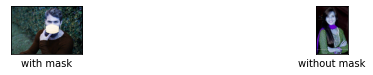

In [6]:
import matplotlib.pyplot as plt
#dataset pictures 1 from each category
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(data_path):
    CATEGORIES.append(i)
    
print(CATEGORIES)

plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(data_path,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show() 